<a href="https://colab.research.google.com/github/sarangbishal/Playing-with-Data/blob/master/Nepal%20Population(2011-12%20by%20age)/Playing_with_Population_Data(2068_69).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Open CSV FILE from [here](https://github.com/opennepal/odp-census/blob/master/Population%20by%20sex%20and%20age-group/data.csv)

If we look at the structure of csv file at given link, all the values are comma separated except the one after Year (AD) column

For a quick fix, I fired up my notepad++ and did replace all with regex pattern *(,)\s+(\w)*
and replace string *\1\2*



In [0]:
df = pd.read_csv("popn_by_age.csv", sep = ",")

In [3]:
df.head(10)

,District,Zone,Ecological Belt,Development Region,Year (BS),Year (AD),Gender,Age-group,Value
0,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Male,10-14,116
1,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Male,15-19,750
2,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Male,20-29,5643
3,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Male,30-39,7856
4,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Male,40-49,7096
5,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Male,50-59,5650
6,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Male,60-69,4495
7,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Male,70 years & above,2490
8,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Female,10-14,39
9,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Female,15-19,231


In [4]:
df.tail(10)

,District,Zone,Ecological Belt,Development Region,Year (BS),Year (AD),Gender,Age-group,Value
1190,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Male,60-69,6348
1191,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Male,70 years & above,3236
1192,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Female,10-14,32
1193,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Female,15-19,398
1194,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Female,20-29,5015
1195,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Female,30-39,5391
1196,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Female,40-49,3425
1197,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Female,50-59,2246
1198,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Female,60-69,1851
1199,Udayapur,Sagarmatha,Hill,Eastern,2068/69,2011/12,Female,70 years & above,914


# How many rows and columns?

In [5]:
df.shape

(1200, 9)

In [6]:
df.columns

Index(['District', 'Zone', 'Ecological Belt', 'Development Region',
       'Year (BS)', 'Year (AD)', 'Gender', 'Age-group', 'Value'],
      dtype='object')

In [7]:
df.describe()

,Value
count,1200.000000
mean,4522.751667
std,7030.197438
min,0.000000
25%,397.000000
50%,2180.500000
75%,5662.250000
max,84672.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
District              1200 non-null object
Zone                  1200 non-null object
Ecological Belt       1200 non-null object
Development Region    1200 non-null object
Year (BS)             1200 non-null object
Year (AD)             1200 non-null object
Gender                1200 non-null object
Age-group             1200 non-null object
Value                 1200 non-null int64
dtypes: int64(1), object(8)
memory usage: 84.5+ KB


# Make dataframes for each development region


In [0]:
far_western_df = df[df["Development Region"] == "Far-Western"]
mid_western_df = df[df["Development Region"] == "Mid-Western"]
western_df = df[df["Development Region"] == "Western"]
central_df = df[df["Development Region"] == "Central"]
eastern_df = df[df["Development Region"] == "Eastern"]

## How many districts are there in Far-Western Development Region?

In [10]:

districts_in_far_western = far_western_df["District"].unique()


print("There are {} districts in Far Western".format(far_western_df["District"].nunique()))
print(*districts_in_far_western, sep = ", ")

There are 9 districts in Far Western
Achham, Baitadi, Bajhang, Bajura, Dadeldhura, Darchula, Doti, Kailali, Kanchanpur


## Find  total male population

In [11]:
male_df = df[df["Gender"] == "Male"]
male_df.head()

male_df["Value"].sum()

4030610

## Total Male Population of Gulmi






In [12]:
gulmi_male = male_df[male_df["District"] == "Gulmi"]
total_male_popn_gulmi = gulmi_male["Value"].sum()
print(total_male_popn_gulmi)

37300


## Total Male Population with age group 20-29

In [13]:
male_popn_20_29 = male_df[male_df["Age-group"] == "20-29"]
male_popn_20_29.head()
print(male_popn_20_29["Value"].sum())

458730


## Total male population with age group 20-29 in Western Development Region

In [14]:
male_popn_20_29_western = male_df[np.logical_and(male_df["Age-group"] == "20-29", male_df["Development Region"] == "Western")]

print(male_popn_20_29_western["Value"].sum())
male_popn_20_29_western.head()

60191


,District,Zone,Ecological Belt,Development Region,Year (BS),Year (AD),Gender,Age-group,Value
18,Arghakhanchi,Lumbini,Hill,Western,2068/69,2011/12,Male,20-29,1892
34,Baglung,Dhawalagiri,Hill,Western,2068/69,2011/12,Male,20-29,2860
354,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Male,20-29,2629
370,Gulmi,Lumbini,Hill,Western,2068/69,2011/12,Male,20-29,2205
514,Kapilbastu,Lumbini,Terai,Western,2068/69,2011/12,Male,20-29,5983


## Population of each Development Region in Acending

In [15]:
df.groupby(by = "Development Region")["Value"].sum().sort_values()

Development Region
Far-Western     469971
Mid-Western     695419
Western        1066362
Eastern        1231505
Central        1964045
Name: Value, dtype: int64

## Age Group with Most Population


In [16]:
df.groupby(by = "Age-group")["Value"].sum().sort_values().tail(1)

Age-group
30-39    1285500
Name: Value, dtype: int64

## Majority age group in Kavrepalanchok

In [17]:
kavre_df = df[df["District"] == "Kavrepalanchok"]
kavre_df.groupby(by = "Age-group")["Value"].sum().sort_values().tail(1)

Age-group
40-49    18968
Name: Value, dtype: int64

## Total Population of Central Development Region

In [18]:
central_df["Value"].sum()

1964045

## Top 5 most populated districts

In [19]:
df.groupby(by = "District")["Value"].sum().sort_values(ascending = False).head()

District
Kathmandu    436344
Morang       213997
Jhapa        184552
Rupandehi    163916
Sunsari      162407
Name: Value, dtype: int64

## What  districts in Lumbini Zone

In [20]:
df_lumbini = df[df["Zone"] == "Lumbini"]
df_lumbini["District"].unique()

array(['Arghakhanchi', 'Gulmi', 'Kapilbastu', 'Nawalparasi', 'Palpa',
       'Rupandehi'], dtype=object)

## Sort DataFrame by Develeopment Region followed by Zone Followed by District

In [21]:
df.sort_values(by = ["Development Region", "Zone", "District"]).head(20)

,District,Zone,Ecological Belt,Development Region,Year (BS),Year (AD),Gender,Age-group,Value
144,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,10-14,42
145,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,15-19,744
146,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,20-29,7808
147,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,30-39,13918
148,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,40-49,13770
149,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,50-59,8553
150,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,60-69,5211
151,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,70 years & above,3359
152,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Female,10-14,24
153,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Female,15-19,375


## Find the name of the districts that starts with G

In [22]:
df[df["District"].str.startswith("G")]

,District,Zone,Ecological Belt,Development Region,Year (BS),Year (AD),Gender,Age-group,Value
352,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Male,10-14,37
353,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Male,15-19,292
354,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Male,20-29,2629
355,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Male,30-39,6122
356,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Male,40-49,9368
357,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Male,50-59,10233
358,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Male,60-69,7531
359,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Male,70 years & above,5550
360,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Female,10-14,48
361,Gorkha,Gandaki,Hill,Western,2068/69,2011/12,Female,15-19,430


### Find the name of the districs that ends with "pur"

In [23]:
df[df["District"].str.endswith("pur")].head(20)

,District,Zone,Ecological Belt,Development Region,Year (BS),Year (AD),Gender,Age-group,Value
144,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,10-14,42
145,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,15-19,744
146,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,20-29,7808
147,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,30-39,13918
148,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,40-49,13770
149,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,50-59,8553
150,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,60-69,5211
151,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Male,70 years & above,3359
152,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Female,10-14,24
153,Bhaktapur,Bagmati,Hill,Central,2068/69,2011/12,Female,15-19,375



### Plot Population of each development region

Text(0.5, 1.0, 'Population Distribution Across Development Regions(2068-69)')

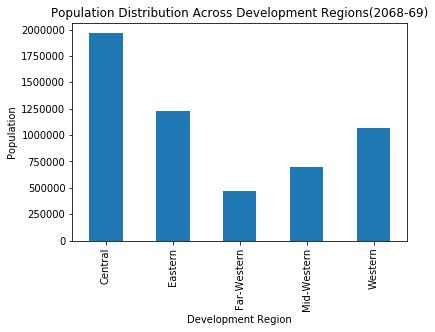

In [24]:
df.groupby(by = "Development Region")["Value"].sum().plot(kind = "bar")
plt.ylabel("Population")
plt.title("Population Distribution Across Development Regions(2068-69)")

### Plot Male Population and Female Population

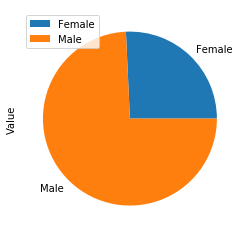

In [25]:
df.groupby(by = "Gender")["Value"].sum().plot(kind = "pie")
plt.gca().legend(("Female", "Male"))

## Plot population distribution by age

Text(0.5, 1.0, 'Population Distribution by Age')

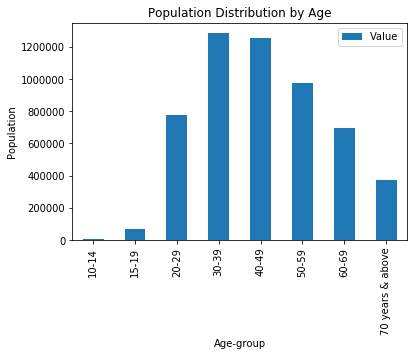

In [26]:
df_popn_age= df.groupby(by = "Age-group").agg({"Value" : "sum"})
df_popn_age["Age-group"] = df["Age-group"].unique()

df_popn_age.plot("Age-group", "Value", kind = "bar")
plt.ylabel("Population")
plt.title("Population Distribution by Age")


# Compare Population by age group of Gulmi district and Kavrepalanchok


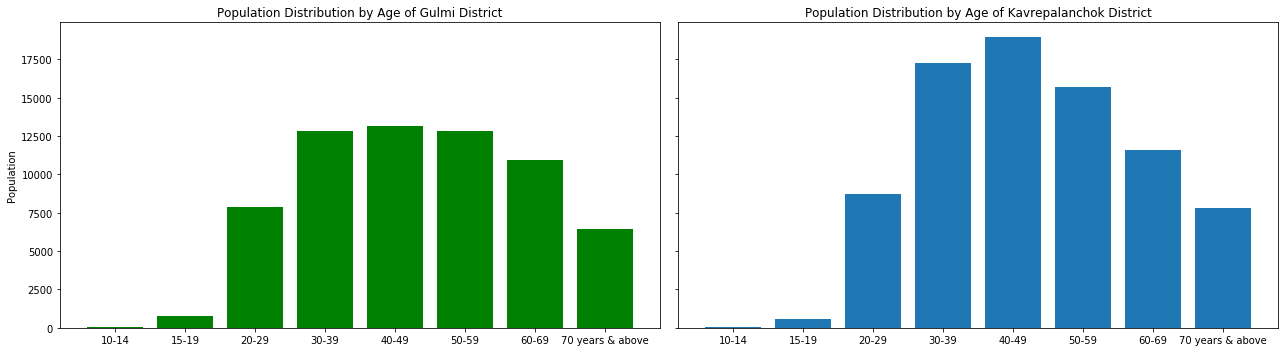

In [28]:
df_gulmi = df[df["District"] == "Gulmi"]
df_kavrepalanchok = df[df["District"] == "Kavrepalanchok"]

fig, axes = plt.subplots(1, 2, sharey= True,figsize = (18, 5))
df_gulmi= df_gulmi.groupby(by = "Age-group").agg({"Value" : "sum"})

df_gulmi["Age-group"] = df["Age-group"].unique()

axes[0].bar(df_gulmi["Age-group"], df_gulmi["Value"], color = "green")
axes[0].set_title("Population Distribution by Age of Gulmi District")

df_kavrepalanchok= df_kavrepalanchok.groupby(by = "Age-group").agg({"Value" : "sum"})
df_kavrepalanchok["Age-group"] = df["Age-group"].unique()
axes[1].bar(df_kavrepalanchok["Age-group"], df_kavrepalanchok["Value"])
axes[1].set_title("Population Distribution by Age of Kavrepalanchok District")
axes[0].set_ylabel("Population")

# Prevent Overlapping between ticks
plt.tight_layout()